<a href="https://colab.research.google.com/github/Puneetgupta2301/Image_classification_CIFAR10_dataset/blob/main/image_classification(CIFAR10_dataset).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing required Libraries

In [18]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import datasets ,layers, models
import numpy as np

Importing Dataset

In [19]:
(X_train, y_train) , (X_test, y_test) = datasets.cifar10.load_data()

In [20]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [21]:
X_train.shape

(50000, 32, 32, 3)

In [22]:
y_test.shape

(10000, 1)

In [23]:
y_test=y_test.reshape(-1, )
y_test

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

In [24]:
classes=['airplane', "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [75]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])


In [26]:
X_train=X_train/255
X_test=X_test/255


In [27]:
from tensorflow import keras
model=keras.Sequential(
    [
        keras.layers.Flatten(input_shape=(32,32,3)),
        keras.layers.Dense(4000,activation='relu'),
        keras.layers.Dense(2000,activation='relu'),
        keras.layers.Dense(10,activation='sigmoid'),
    ]
)
model.compile(
    optimizer='SGD',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [28]:
model.fit(X_train, y_train ,epochs=1)

1563/1563 [==============================] - 260s 166ms/step - loss: 1.8042 - accuracy: 0.3561


In [29]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 14s 45ms/step - loss: 1.6664 - accuracy: 0.4099


[1.666367530822754, 0.4099000096321106]

In [30]:
y_pred=model.predict(X_test)

313/313 [==============================] - 14s 44ms/step


In [31]:
y_pred[1]

array([0.8122809 , 0.9512911 , 0.19536136, 0.46663284, 0.12513547,
       0.21048471, 0.05304185, 0.2206127 , 0.9224062 , 0.9788162 ],
      dtype=float32)

In [32]:
cnn=keras.Sequential([
    layers.Conv2D(filters=32,kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=32,kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    #dense
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax'),
])
cnn.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [33]:
cnn.fit(X_train,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 52s 33ms/step - loss: 1.4909 - accuracy: 0.4617
Epoch 2/10
1563/1563 [==============================] - 51s 33ms/step - loss: 1.1749 - accuracy: 0.5853
Epoch 3/10
1563/1563 [==============================] - 52s 33ms/step - loss: 1.0438 - accuracy: 0.6345
Epoch 4/10
1563/1563 [==============================] - 55s 35ms/step - loss: 0.9654 - accuracy: 0.6642
Epoch 5/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.9073 - accuracy: 0.6869
Epoch 6/10
1563/1563 [==============================] - 53s 34ms/step - loss: 0.8601 - accuracy: 0.6992
Epoch 7/10
1563/1563 [==============================] - 52s 33ms/step - loss: 0.8168 - accuracy: 0.7162
Epoch 8/10
1563/1563 [==============================] - 51s 33ms/step - loss: 0.7750 - accuracy: 0.7286
Epoch 9/10
1563/1563 [==============================] - 52s 33ms/step - loss: 0.7433 - accuracy: 0.7420
Epoch 10/10
1563/1563 [==============================] - 52s 33m

In [38]:
yp=cnn.predict(X_test)
yp[:5]

313/313 [==============================] - 3s 11ms/step


array([[4.15772805e-03, 9.32254916e-05, 8.84726644e-03, 6.53664052e-01,
        1.59920513e-04, 3.12217027e-01, 2.72373389e-03, 3.15468031e-04,
        1.69903487e-02, 8.31399288e-04],
       [1.48944221e-02, 2.04413727e-01, 2.21785303e-05, 4.59525472e-06,
        6.63677793e-06, 4.80562562e-07, 3.96587609e-07, 4.20492761e-08,
        7.79363215e-01, 1.29432499e-03],
       [7.52318799e-02, 3.37044448e-02, 6.64296933e-03, 2.96834391e-02,
        2.71768477e-02, 4.95625241e-03, 1.00720084e-04, 6.50472997e-04,
        7.61339545e-01, 6.05134554e-02],
       [7.79705584e-01, 1.98591733e-03, 3.19540091e-02, 1.27904927e-02,
        6.86550606e-03, 4.41312412e-04, 3.84439132e-04, 3.53245740e-03,
        1.57326028e-01, 5.01423469e-03],
       [2.14447336e-05, 7.30362103e-07, 1.16213793e-02, 1.50321066e-01,
        7.57629931e-01, 1.30957467e-02, 6.72416687e-02, 6.68067696e-06,
        5.16126820e-05, 9.83729115e-06]], dtype=float32)

In [41]:
y_classes=[np.argmax(elements) for elements in yp]
y_classes[:5]

[3, 8, 8, 0, 4]

In [43]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_classes))

0.6687


In [71]:
classes[y_test[1]]

'ship'

In [68]:
classes[y_classes[1]]

'ship'

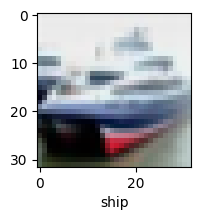

In [76]:
plot_sample(X_test,y_test,1)